In [1]:
!git clone https://github.com/hughplay/DFNet.git
%cd DFNet/

Cloning into 'DFNet'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 72 (delta 3), reused 8 (delta 3), pack-reused 61
Unpacking objects: 100% (72/72), done.
/content/DFNet


In [1]:
# !wget --no-check-certificate https://zenodo.org/record/4992308/files/model_celeba.pth -O model/model_celeba.pth
# !wget --no-check-certificate https://zenodo.org/record/4992308/files/model_places2.pth -O model/model_places2.pth
!wget --no-check-certificate https://zenodo.org/record/4992308/files/model_places2_2021.pth -O model/model_places2_2021.pth

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
from test import Tester
from PIL import Image
import cv2
import argparse
import matplotlib.pyplot as plt


In [26]:
parser = argparse.ArgumentParser()
parser.add_argument(
    '-m', '--model', default='./model/model_places2.pth',
    help='Select a checkpoint.')
parser.add_argument(
    '-i', '--input_size', default=0, type=int,
    help='Batch size for testing.')
parser.add_argument(
    '-b', '--batch_size', default=8, type=int,
    help='Batch size for testing.')
parser.add_argument(
    '--img', default='./samples/places2/img',
    help='Image or Image folder.')
parser.add_argument(
    '--mask', default='./samples/places2/mask',
    help='Mask or Mask folder.')
parser.add_argument('--output', default='./output/places2',
    help='Output dir')
parser.add_argument(
    '--merge', action='store_true',
    help='Whether merge input and results for better viewing.')
args = parser.parse_args(args=['--merge'])
args

Namespace(model='./model/model_places2.pth', input_size=0, batch_size=8, img='./samples/places2/img', mask='./samples/places2/mask', output='./output/places2', merge=True)

## Inpainting multiple images

Using gpu.


  0%|          | 0/1 [00:00<?, ?it/s]

Model ./model/model_places2.pth loaded.
# Inpainting...
Input size: (512, 512)


4it [00:00, 40.07it/s]
0it [00:00, ?it/s]

Inpainting finished.
# Preparing input images...
Total images: 4 4
# Merging...
Total images: [4, 4, 4, 4, 4]
Row: 1
Column: 5


4it [00:00, 12.47it/s]


Merging finished.


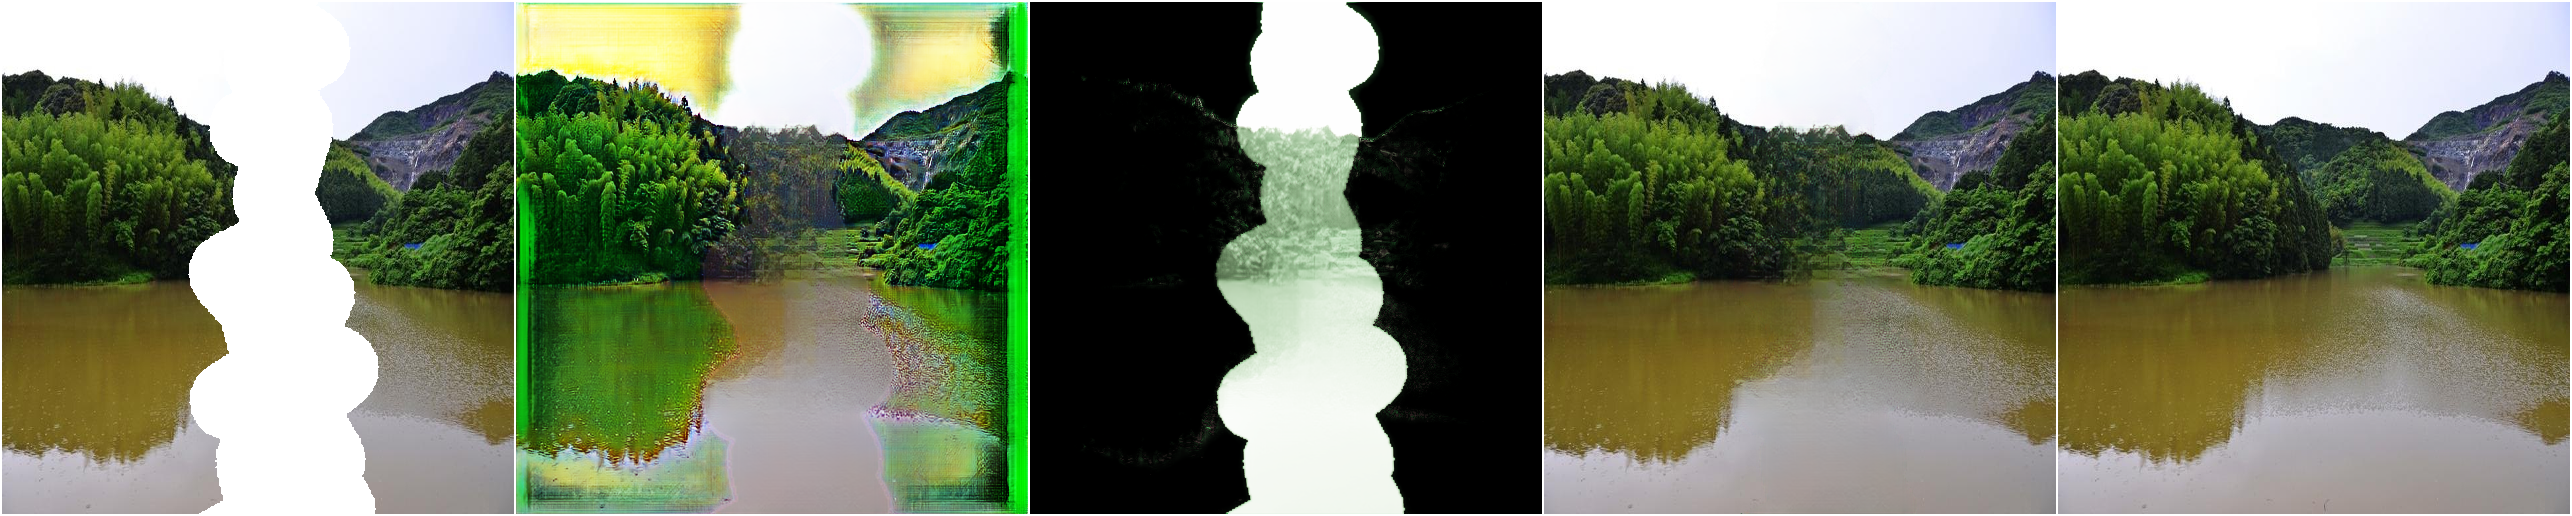

In [5]:
tester = Tester(args.model, args.input_size, args.batch_size)
tester.inpaint(args.output, args.img, args.mask, merge_result=args.merge)
Image.open('output/places2/merge/merge_0000.png')

Using gpu.


  0%|          | 0/1 [00:00<?, ?it/s]

Model model/model_places2_2021.pth loaded.
# Inpainting...
Input size: (512, 512)


4it [00:00, 41.58it/s]
0it [00:00, ?it/s]

Inpainting finished.
# Preparing input images...
Total images: 4 4
# Merging...
Total images: [4, 4, 4, 4, 4]
Row: 1
Column: 5


4it [00:00, 11.99it/s]


Merging finished.


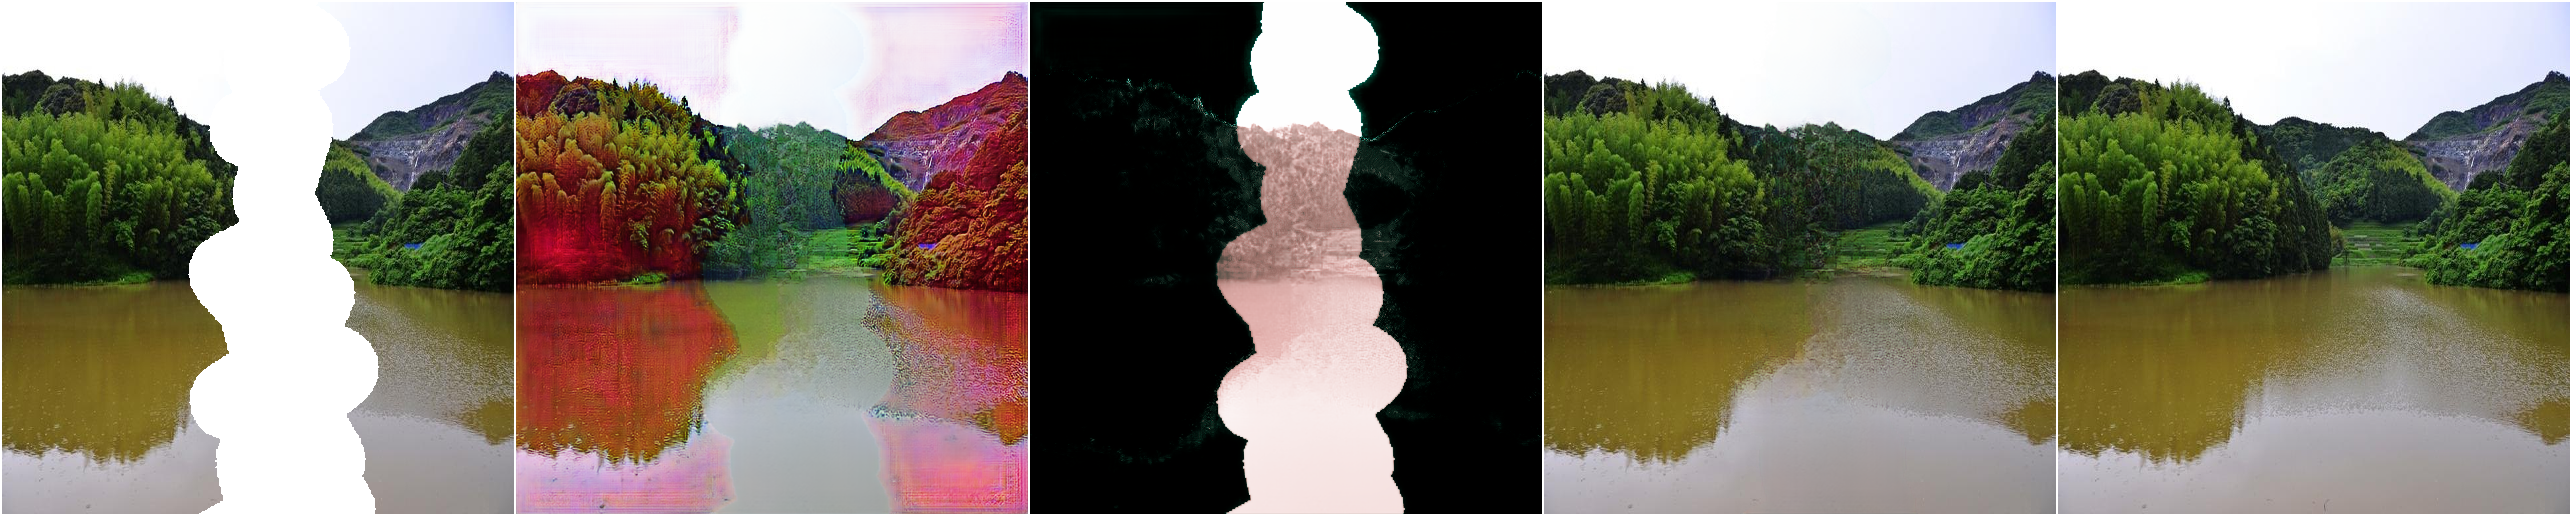

In [6]:
# Trained with https://github.com/deepcodebase/inpaint
args.model = 'model/model_places2_2021.pth'
tester = Tester(args.model, args.input_size, args.batch_size)
tester.inpaint(args.output, args.img, args.mask, merge_result=args.merge)
Image.open('output/places2/merge/merge_0000.png')

Using gpu.


4it [00:00, 132.53it/s]
0it [00:00, ?it/s]

Model model/model_celeba.pth loaded.
# Inpainting...
Input size: (256, 256)
Inpainting finished.
# Preparing input images...
Total images: 4 4
# Merging...
Total images: [4, 4, 4, 4, 4]
Row: 1
Column: 5


4it [00:00, 49.21it/s]


Merging finished.


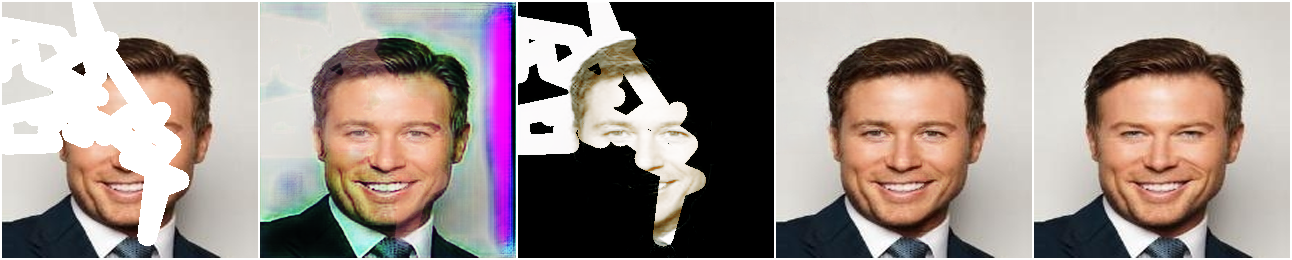

In [7]:
args.model = 'model/model_celeba.pth'
tester = Tester(args.model, args.input_size, args.batch_size)
tester.inpaint('output/celeba', 'samples/celeba/img', 'samples/celeba/mask', merge_result=True)
Image.open('output/celeba/merge/merge_0000.png')

## Inpainting one single image

In [ ]:
args.model = 'model/model_places2_2021.pth'
tester = Tester(args.model, args.input_size, args.batch_size)
tester.inpaint('output/custom', 'samples/places2/img/img_01.png', 'samples/places2/mask/mask_02.png', merge_result=True)
Image.open('output/custom/merge/merge_0000.png')

Using cpu.


  0%|          | 0/1 [00:00<?, ?it/s]

Model model/model_places2.pth loaded.
# Inpainting...
Input size: (512, 512)


1it [00:00,  7.46it/s]                       
0it [00:00, ?it/s]

Inpainting finished.
# Preparing input images...
Total images: 1 1
# Merging...
Total images: [1, 6, 6, 3, 1]
Row: 1
Column: 5


1it [00:00,  4.98it/s]

Merging finished.


Text(0.5, 1.0, 'Result')

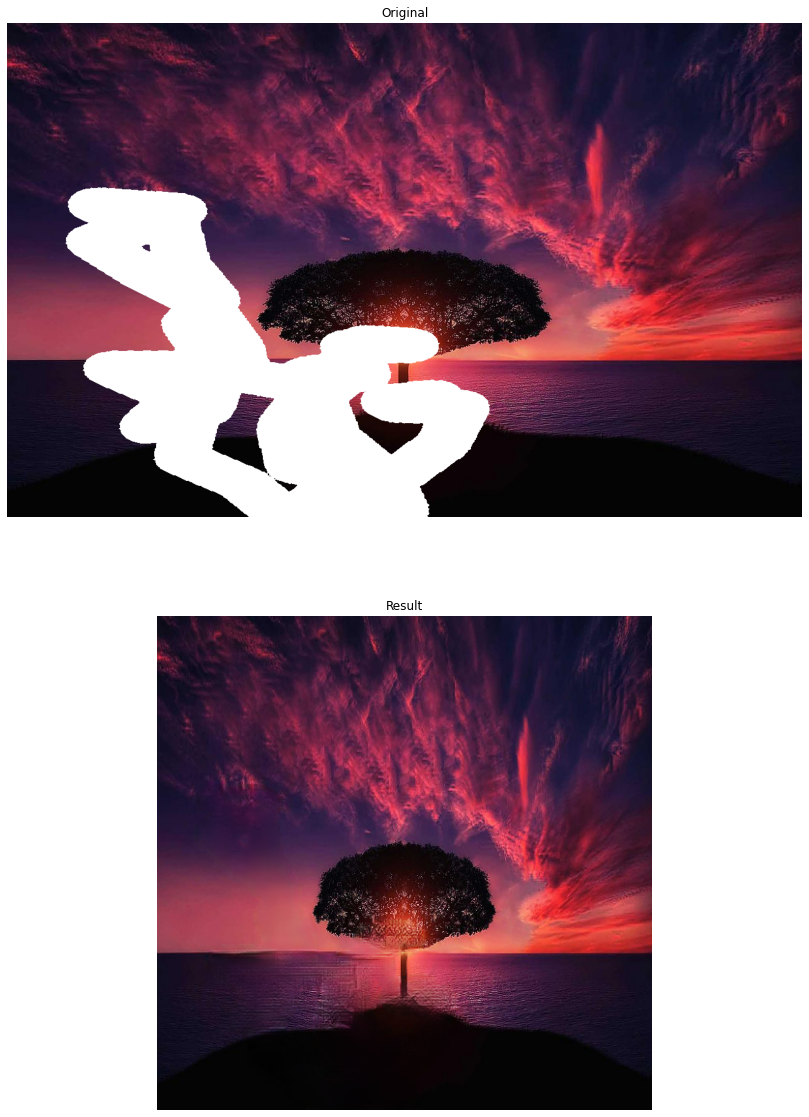

In [33]:
import matplotlib.image as mpimg

args.model = 'model/model_places2.pth'
tester = Tester(args.model, args.input_size,
                args.batch_size)
tester.inpaint('output/custom', 'img2.jpg',
               'samples/places2/mask/mask_04.png', merge_result=True)

fig = plt.figure(figsize=(20, 20))
miss = mpimg.imread('output/custom/miss/miss_0001.png')
result = mpimg.imread('output/custom/result/result-img2-mask_04.png')
rows = 2
columns = 1

fig.add_subplot(rows, columns, 1)
plt.imshow(miss)
plt.axis('off')
plt.title("Original")

fig.add_subplot(rows, columns, 2)
plt.imshow(result)
plt.axis('off')
plt.title("Result")
# cv2.imshow("original", miss)
# cv2.imshow("result", result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

